In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

In [4]:
#Load the CSV file
path='/content/drive/My Drive/csv/diabetes.csv"

In [5]:
df = pd.read_csv(path)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
#Check null value
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
#correlation matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

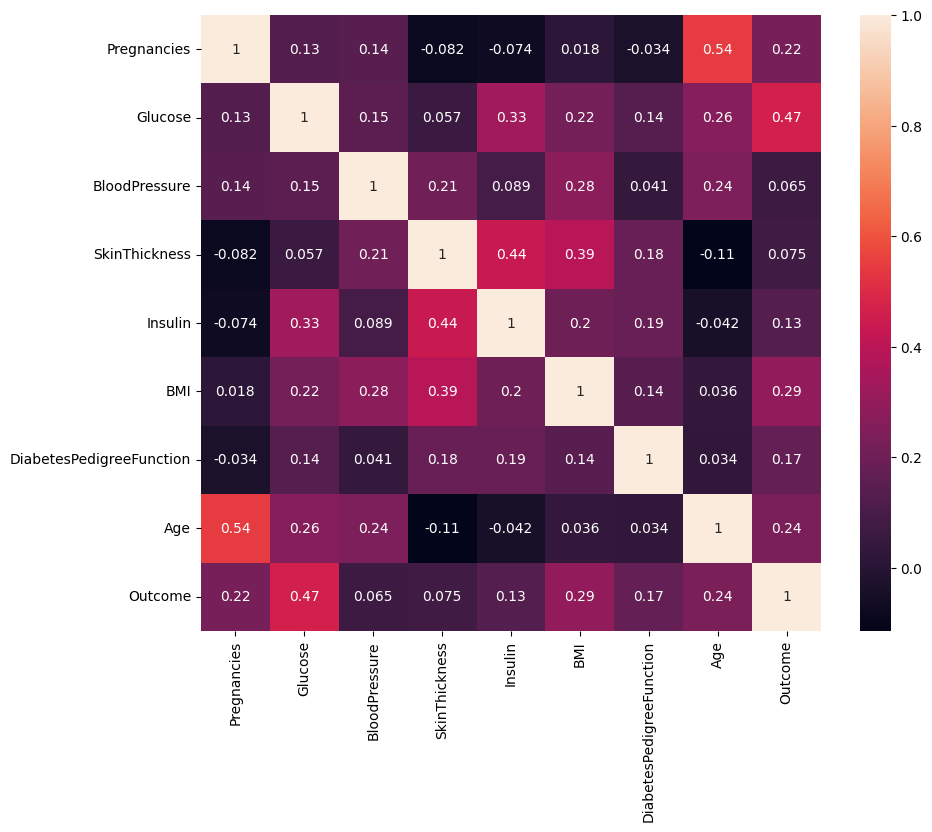

In [9]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

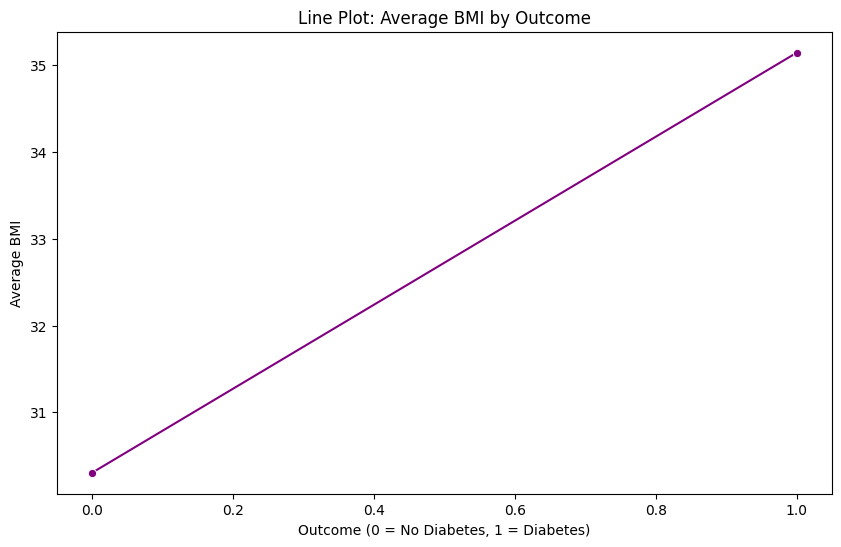

In [13]:
#Line Plot: Average BMI by Outcome
plt.figure(figsize=(10, 6))
average_bmi = df.groupby('Outcome')['BMI'].mean()
sns.lineplot(x=average_bmi.index, y=average_bmi.values, marker='o', color='purple')

plt.title('Line Plot: Average BMI by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Average BMI')
plt.show()


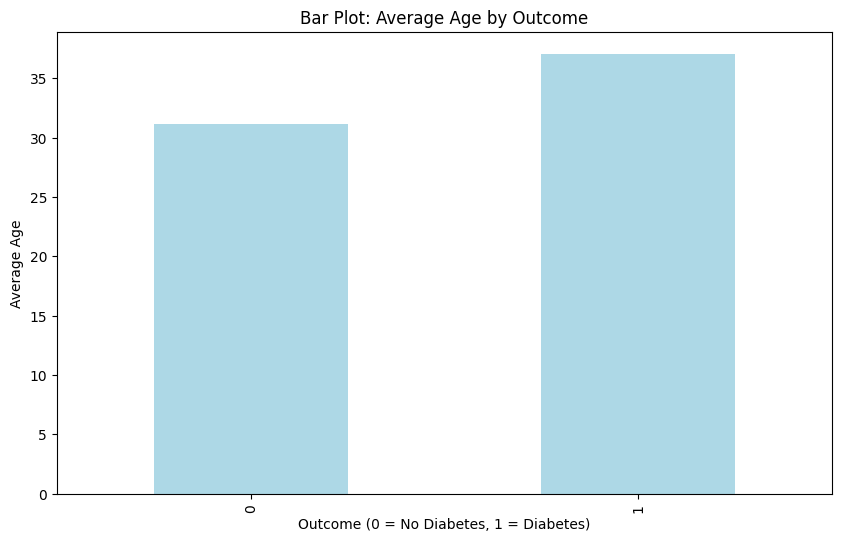

In [11]:
#Bar plot:BMI vs Outcome
plt.figure(figsize=(10, 6))
df.groupby('Outcome')['Age'].mean().plot(kind='bar', color='lightblue')
plt.title('Bar Plot: Average Age by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Average Age')
plt.show()



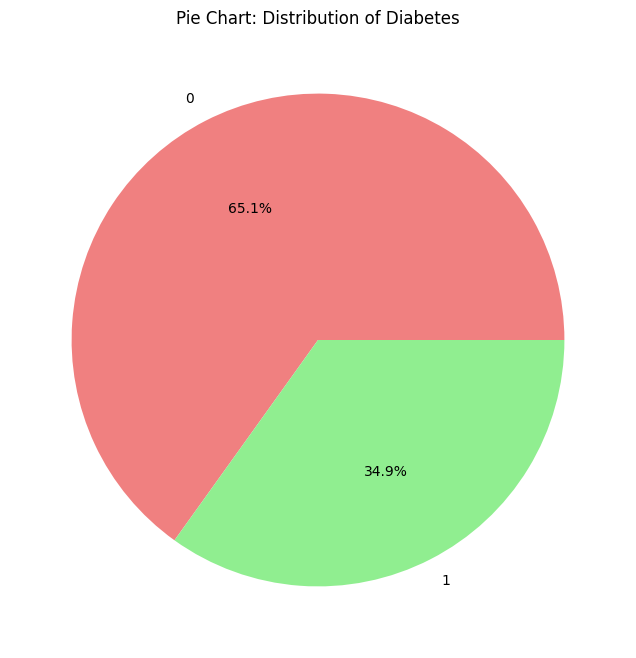

In [23]:
#Pie Chart: Distribution of Diabetes
plt.figure(figsize=(8, 8))
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Pie Chart: Distribution of Diabetes')
plt.ylabel('')
plt.show()


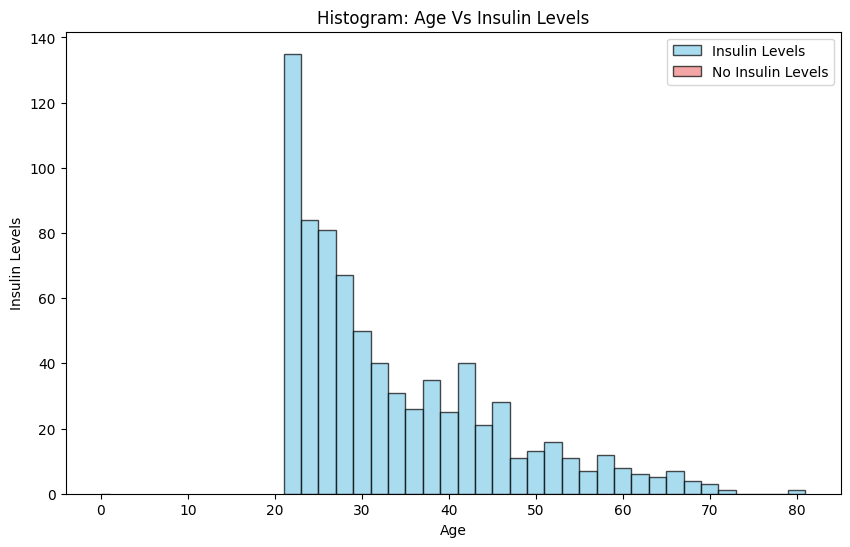

In [34]:
#Histogram: Age Vs Insulin Levels
plt.figure(figsize=(10, 6))
plt.hist(df[df['Insulin'].notna()]['Age'], bins=30, alpha=0.7, label='Insulin Levels', color='skyblue', edgecolor='black')
plt.hist(df[df['Insulin'].isna()]['Age'], bins=30, alpha=0.7, label='No Insulin Levels', color='lightcoral', edgecolor='black')

plt.title('Histogram: Age Vs Insulin Levels')
plt.xlabel('Age')
plt.ylabel('Insulin Levels')
plt.legend()
plt.show()


# Logistic Regresssion

In [24]:
# Code Here (Add as many cells as you need)
x = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35      140  28.6   
106            1       96            122              0        0  22.4   
270           10      101             86             37        0  45.6   
435            0      141              0              0        0  42.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  


In [25]:
x.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


In [36]:
#model with default parameter
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
print(reg.coef_)

print(reg.intercept_)

[[ 1.17252323e-01  3.35996240e-02 -1.40874333e-02 -1.27055194e-03
  -1.24030932e-03  7.72025779e-02  1.41904101e+00  1.00355633e-02]]
[-7.70289515]


In [37]:
y_pred1 = reg.predict(x_test)
print(y_pred1)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7467532467532467

# Datset Model Evaluation:

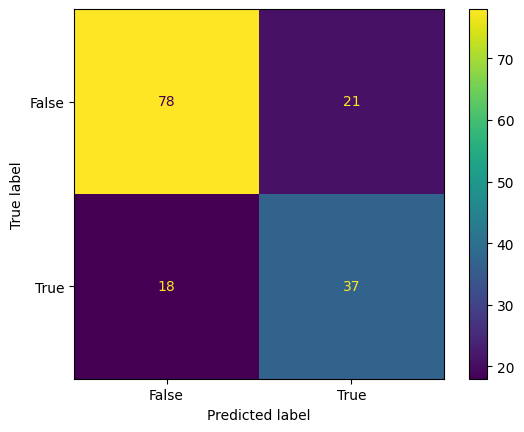

In [42]:
#confuison matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred1)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred1)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred1)
print("F1-Score:", f1)

Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall (Sensitivity): 0.6727272727272727
F1-Score: 0.6548672566371682
